# Title: Cloud Instances Recommender for NB w RFC Balanced Class Application

# Library Load

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.cluster import KMeans
from sklearn import preprocessing
import numpy as np
import math
from statistics import mean 
import statistics
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.utils import shuffle

%matplotlib inline

# Read Dataset 

In [5]:
# dataset 
df = pd.read_csv("dataset_memory_AI.csv")

# QODE verification dataset 
df_veri= pd.read_csv("dataset_memory_runtime_scala.csv")
df

,Rating,Cost(per hour USD),Instance
0,3.333333,0.0928,t2.large
1,1.666667,0.0832,B2ms
2,2.666667,0.0950,N1s2
3,1.666667,0.0150,Lin.G
4,4.000000,0.1000,c4.large
...,...,...,...
415,2.000000,0.0230,t2.small
416,4.000000,0.0752,t3a.large
417,4.000000,0.0376,t3a.medium
418,3.000000,0.0188,t3a.small


In [6]:
df = shuffle(df)
df=df.append(df_veri)

In [7]:
df

,Rating,Cost(per hour USD),Instance
24,2.666667,0.1000,c4.large
92,3.000000,0.0850,c5.large
407,1.000000,0.0450,Lin.C
329,2.000000,0.1260,E2s
109,2.000000,0.1260,E2s
...,...,...,...
15,1.000000,0.0230,t2.small
16,3.666667,0.0752,t3a.large
17,3.666667,0.0376,t3a.medium
18,3.666667,0.0188,t3a.small


# Data Plot

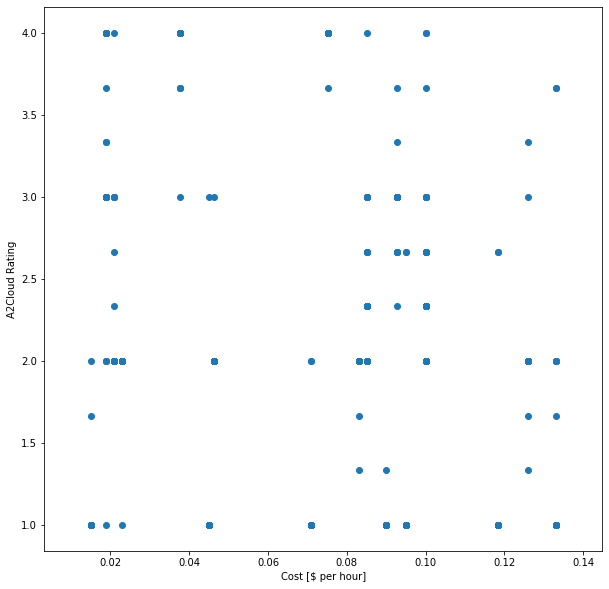

In [8]:
fig = plt.figure(figsize=(10, 10))

plt.scatter(df.iloc[:,1:2],df.iloc[:,0:1],  marker='o')
plt.xlabel('Cost [$ per hour]')
plt.ylabel('A2Cloud Rating')
plt.show()

# K-Means

In [9]:
X=df.iloc[:,0:2]
model = KMeans(n_clusters = 4)
kmeans=model.fit(X)
labels = kmeans.labels_ # creating classification columns for supervised learning 
labels

array([1, 1, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 3, 2, 2, 0, 0,
       1, 2, 1, 1, 3, 1, 1, 0, 2, 2, 2, 3, 2, 0, 1, 2, 2, 1, 0, 0, 1, 0,
       0, 2, 0, 0, 3, 0, 2, 1, 1, 2, 3, 1, 2, 1, 2, 2, 3, 2, 0, 2, 3, 0,
       1, 1, 0, 2, 2, 2, 2, 0, 0, 0, 3, 3, 2, 3, 2, 2, 2, 2, 2, 0, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 3, 2, 2, 1, 0, 0, 0, 0, 2, 0, 0, 1, 3, 0, 0,
       1, 0, 2, 1, 3, 2, 2, 2, 0, 2, 0, 2, 0, 2, 1, 2, 3, 0, 2, 2, 2, 0,
       3, 2, 0, 0, 0, 2, 2, 0, 3, 0, 1, 3, 0, 2, 0, 0, 2, 1, 2, 2, 3, 2,
       2, 0, 1, 2, 3, 1, 2, 0, 3, 3, 0, 2, 2, 2, 0, 1, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 0, 1, 0, 0, 2, 3, 1, 0, 0, 0, 2, 2, 1, 0, 0, 2, 3, 0, 2,
       2, 2, 2, 0, 1, 2, 0, 2, 0, 2, 1, 2, 1, 2, 2, 0, 2, 2, 3, 0, 2, 2,
       2, 2, 3, 2, 0, 1, 2, 0, 1, 2, 0, 3, 0, 0, 2, 2, 2, 2, 0, 1, 2, 2,
       2, 3, 2, 2, 2, 2, 2, 0, 0, 2, 1, 3, 0, 3, 0, 3, 2, 1, 0, 0, 3, 2,
       2, 2, 0, 0, 2, 1, 1, 2, 1, 3, 0, 0, 2, 3, 3, 0, 0, 1, 2, 0, 2, 2,
       0, 1, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 0, 1, 1,

In [10]:
df['cluster']=labels


# Plot Data

Text(0, 0.5, 'A2Cloud Score')

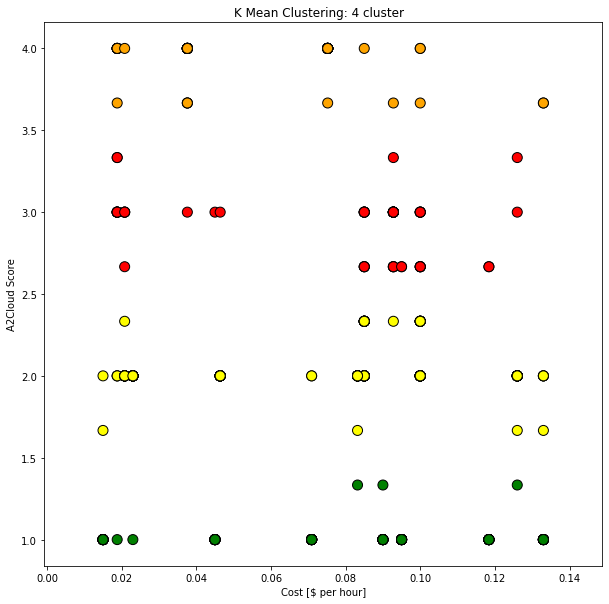

In [11]:
fig = plt.figure(figsize=(10, 10))
 # Create a colormap
colormap = np.array(['green', 'red','yellow','orange'])
plt.scatter(df.iloc[:,1:2], df.iloc[:,0:1], c=colormap[labels], edgecolor = 'black', s = 100)
plt.title('K Mean Clustering: 4 cluster  ')
plt.xlabel('Cost [$ per hour]')
plt.ylabel('A2Cloud Score')

### Cluster Number conversion: 4-excellent, 3-good, 2-avg, 1- bad

In [12]:
df.tail(20)

,Rating,Cost(per hour USD),Instance,cluster
0,3.666667,0.0928,t2.large,3
1,1.333333,0.0832,B2ms,0
2,2.666667,0.0950,N1s2,1
3,2.000000,0.0150,Lin.G,2
4,4.000000,0.1000,c4.large,3
5,2.666667,0.0850,F2s,1
6,2.000000,0.0709,N1cc,2
7,3.000000,0.0450,Lin.C,1
8,3.666667,0.1330,r4.large,3
9,3.000000,0.1260,E2s,1


In [13]:
#dataset save as csv file
df.to_csv(r'dataset_new.csv',index=False)
df_new = pd.read_csv("dataset_new.csv")
df1=df_new

# check cluster label and set manually to each run
df_new=df_new.replace({'cluster':0},5)
df_new=df_new.replace({'cluster':1},7)
df_new=df_new.replace({'cluster':2},6)
df_new=df_new.replace({'cluster':3},8)

df_new=df_new.replace({'cluster':5},1)
df_new=df_new.replace({'cluster':6},2)
df_new=df_new.replace({'cluster':7},3)
df_new=df_new.replace({'cluster':8},4)

In [14]:
df=df_new

# Training

In [15]:
xtrain=df[['Rating','Cost(per hour USD)']]
xtrain=xtrain[0:336]
ytrain=df['cluster'].values.tolist()
ytrain=ytrain[0:336]

In [16]:
classifier = GaussianNB()
classifier.fit(xtrain, ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

# Testing 

In [38]:
xtest=df[['Rating','Cost(per hour USD)']]
xtest=xtest[336:420]
b=df['cluster'].values.tolist()

y_actual=b[336:420]

In [39]:
y_pred = classifier.predict(xtest)
y_pred

array([4, 2, 1, 2, 2, 4, 3, 4, 1, 2, 2, 3, 2, 4, 1, 4, 3, 4, 4, 2, 1, 2,
       2, 2, 3, 2, 4, 2, 2, 1, 1, 1, 1, 2, 1, 2, 3, 2, 1, 1, 2, 2, 2, 4,
       1, 2, 2, 1, 2, 2, 1, 2, 3, 3, 1, 2, 4, 1, 3, 2, 1, 4, 1, 2, 2, 1,
       3, 1, 4, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 4, 1, 2, 1])

In [40]:
print('Model Accuracy is',100*accuracy_score(y_pred,y_actual),'%')


Model Accuracy is 100.0 %


In [41]:
print(confusion_matrix(y_pred, y_actual))


[[25  0  0  0]
 [ 0 37  0  0]
 [ 0  0  9  0]
 [ 0  0  0 13]]


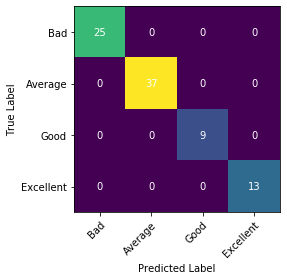

In [42]:
a_label = ["Bad","Average","Good","Excellent"]
p_label = ["Bad","Average","Good","Excellent"]

cm=confusion_matrix(y_pred, y_actual)

fig, ax = plt.subplots()
im = ax.imshow(cm)

# We want to show all ticks...
ax.set_xticks(np.arange(len(a_label)))
ax.set_yticks(np.arange(len(p_label)))
# ... and label them with the respective list entries
ax.set_xticklabels(a_label)
ax.set_yticklabels(a_label)
ax.set_ylim(len(cm)-0.5, -0.5)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(a_label)):
    for j in range(len(p_label)):
        text = ax.text(j, i, cm[i, j],
                       ha="center", va="center", color="w")
ax.set_xlabel("Predicted Label")        
ax.set_ylabel("True Label")        

fig.tight_layout()
plt.show()

# SCALA Verification 

In [22]:
x_qode=df_veri[['Rating','Cost(per hour USD)']]

y_pred = classifier.predict(x_qode)

In [24]:
y_actual=b[420:440]
print('Model Accuracy is',100*accuracy_score(y_pred,y_actual),'%')


Model Accuracy is 90.0 %


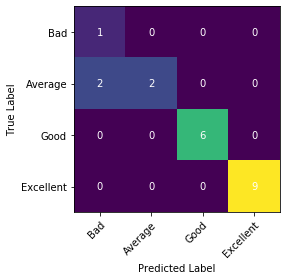

In [25]:
a_label = ["Bad","Average","Good","Excellent"]
p_label = ["Bad","Average","Good","Excellent"]

cm=confusion_matrix(y_pred, y_actual)

fig, ax = plt.subplots()
im = ax.imshow(cm)

# We want to show all ticks...
ax.set_xticks(np.arange(len(a_label)))
ax.set_yticks(np.arange(len(p_label)))
# ... and label them with the respective list entries
ax.set_xticklabels(a_label)
ax.set_yticklabels(a_label)
ax.set_ylim(len(cm)-0.5, -0.5)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(a_label)):
    for j in range(len(p_label)):
        text = ax.text(j, i, cm[i, j],
                       ha="center", va="center", color="w")
ax.set_xlabel("Predicted Label")        
ax.set_ylabel("True Label")        

fig.tight_layout()
plt.show()

In [26]:
print(classification_report(y_actual, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.33      0.50         3
           2       0.50      1.00      0.67         2
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         9

    accuracy                           0.90        20
   macro avg       0.88      0.83      0.79        20
weighted avg       0.95      0.90      0.89        20



## Get Instance Suggestion for New application: Input=[A2Cloud_score, cost_per_hour]


In [28]:
# Input from user 

rating = float(input(' Rating (1 to 4): '))
cost = float(input('Cost of instance (per hour): '))

# prediction function implementation
def Prediction(rating,cost):
    y_pred = classifier.predict((np.array([rating,cost])).reshape(1, -1))[0]
    return y_pred
    
# prediction function call 
guess_cluster=Prediction(rating,cost) 

#slice dataset based on the predicited cluster 
training=df[0:336]
training=training[training['cluster']==guess_cluster]

 Rating (1 to 4): 2
Cost of instance (per hour): .1


### Mulitple Instance Recommendation

In [29]:
# calculate unique instances name in the predicted cluster 
instance=training['Instance'].unique()
print("The Recommended Instances are: ",instance)

The Recommended Instances are:  ['E2s' 'F2s' 't2.small' 'c5.large' 't3.small' 'B2ms' 'm4.large'
 't3a.small' 't2.medium' 'c4.large' 't2.large' 'N1cc' 'Lin.G' 'r4.large']


### Single Instance Recommendation

In [30]:
instance_single=training.sort_values(by=['Rating', 'Cost(per hour USD)'])
instance_single=instance_single.iloc[0:1,:]
print("Instance recommendation for your App: ",instance_single.iloc[0,2:3][0] )

Instance recommendation for your App:  Lin.G
